In [1]:
import os

from genomics.popgen.plink.convert import to_eigen
from genomics.popgen.pca import plot, smart
%matplotlib inline

## Meta-data load

In [2]:
f = open('relationships_w_pops_121708.txt')
ind_pop = {}
f.readline()  # header
for l in f:
    toks = l.rstrip().split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    pop = toks[-1]
    ind_pop['/'.join([fam_id, ind_id])] = pop
f.close()
ind_pop['2469/NA20281'] = ind_pop['2805/NA20281']

## Requires plink from data preparation

In [3]:
to_eigen('hapmap10_auto_noofs_ld_12', 'hapmap10_auto_noofs_ld_12')

## Running smartpca

In [4]:
ctrl = smart.SmartPCAController('hapmap10_auto_noofs_ld_12')
ctrl.run()

In [5]:
wei, wei_perc, ind_comp = smart.parse_evec('hapmap10_auto_noofs_ld_12.evec', 'hapmap10_auto_noofs_ld_12.eval')

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6469be2550>)

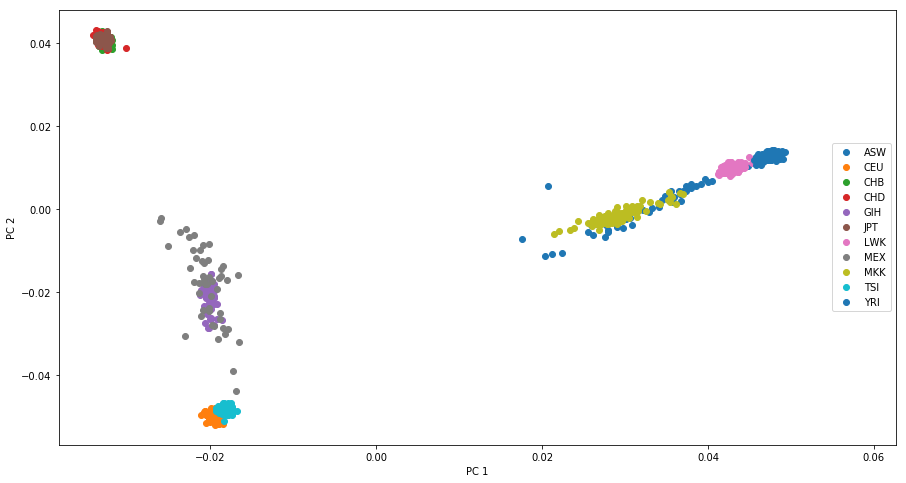

In [6]:
plot.render_pca(ind_comp, 1, 2, cluster=ind_pop)
#put weights

(<Figure size 1080x576 with 5 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f6465e90978>])

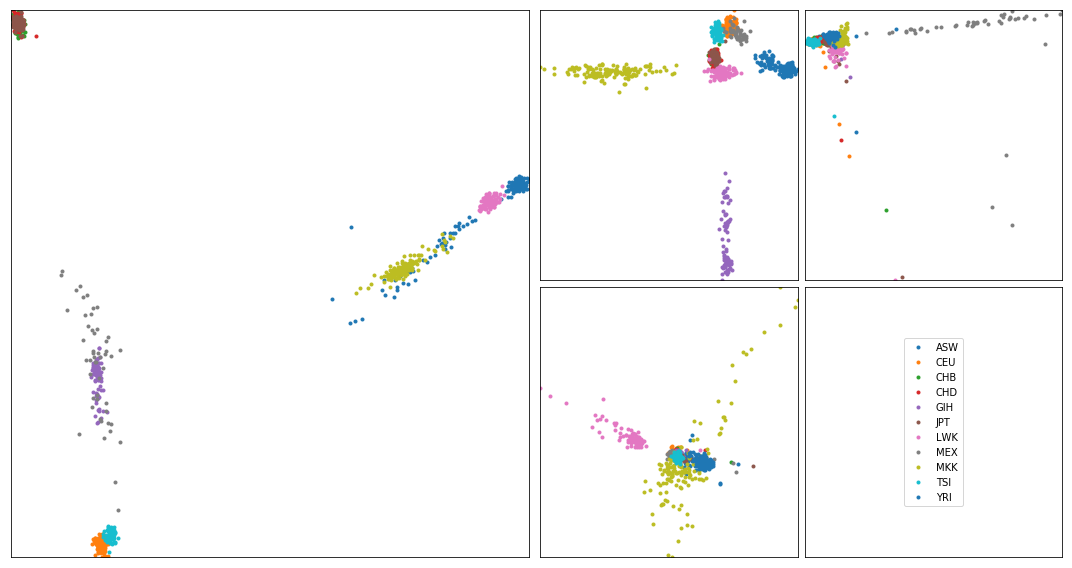

In [7]:
plot.render_pca_eight(ind_comp, cluster=ind_pop)

In [8]:
markers = { 'CHB': '*', 'CHD': '*', 'JPT': '*', 'GIH': '*',
           'CEU': 'v', 'TSI': 'v', 'MEX': 'v',
           'ASW': 'o', 'LWK': 'o', 'YRI': 'o', 'MKK': 'o'
           }


## With scikit-learn

In [9]:
from sklearn.decomposition import PCA
import numpy as np

In [10]:
f = open('hapmap10_auto_noofs_ld_12.ped')
ninds = 0
ind_order = []
for line in f:
    ninds += 1
    toks = line[:100].replace(' ', '\t').split('\t') #  for speed
    fam_id = toks[0]
    ind_id = toks[1]
    ind_order.append('%s/%s' % (fam_id, ind_id))
nsnps = (len(line.replace(' ', '\t').split('\t')) - 6) // 2
print (nsnps)
f.close()

55345


In [12]:
pca_array = np.empty((ninds, nsnps), dtype=int)
print(pca_array.shape)
f = open('hapmap10_auto_noofs_ld_12.ped')
for ind, line in enumerate(f):
    snps = line.replace(' ', '\t').split('\t')[6:]
    for pos in range(len(snps) // 2):
        a1 = int(snps[2 * pos])
        a2 = int(snps[2 * pos])
        my_code = a1 + a2 - 2
        pca_array[ind, pos] = my_code
f.close()
#slow

(988, 55345)


In [13]:
my_pca = PCA(n_components=8)
my_pca.fit(pca_array)
trans = my_pca.transform(pca_array)
#Memory required

(<Figure size 1080x576 with 5 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f643d4f5b38>])

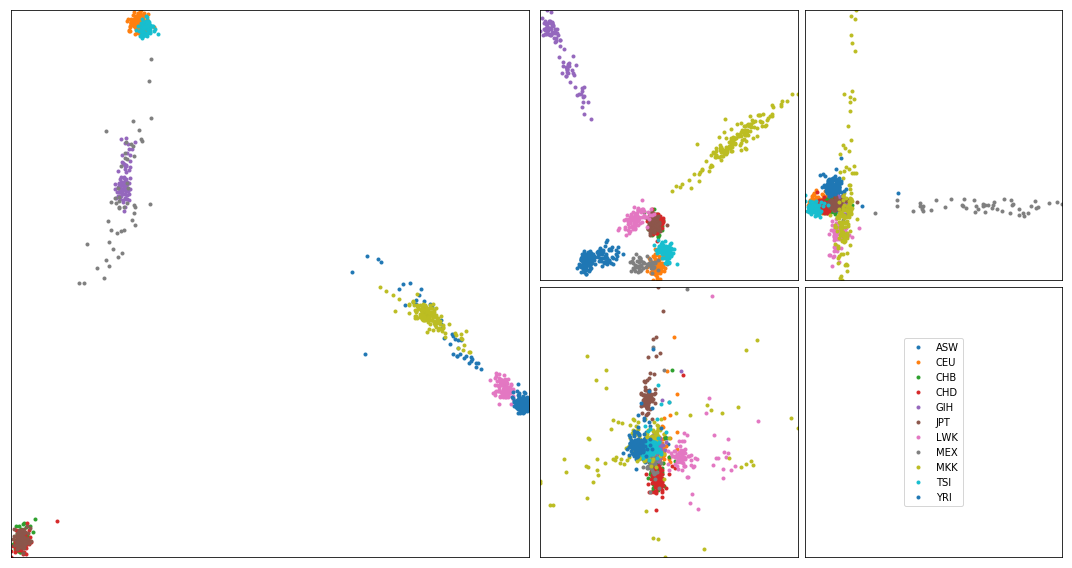

In [14]:
sc_ind_comp = {}
for i, ind_pca in enumerate(trans):
    sc_ind_comp[ind_order[i]] = ind_pca
plot.render_pca_eight(sc_ind_comp, cluster=ind_pop)